In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1
!pip install tensorflow-addons > /dev/null 2>&1

!pip install --upgrade pandas > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

import os
from tensorflow.python.profiler import profiler_client
#tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
#print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

Found existing installation: tensorflow 2.4.3
Uninstalling tensorflow-2.4.3:
  Successfully uninstalled tensorflow-2.4.3
Tensorflow version 2.4.3
INFO:tensorflow:Initializing the TPU system: grpc://10.27.131.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.27.131.122:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.27.131.122:8470']


In [ ]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

 85% 64.0M/75.4M [00:00<00:00, 155MB/s]
100% 75.4M/75.4M [00:00<00:00, 154MB/s]
100% 139M/139M [00:01<00:00, 118MB/s]
100% 139M/139M [00:01<00:00, 111MB/s]
  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 140MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [ ]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/results"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

In [ ]:
!kaggle datasets download --unzip --force -d mavillan/gb-vpp-folds-split

 66% 5.00M/7.57M [00:00<00:00, 49.9MB/s]
100% 7.57M/7.57M [00:00<00:00, 48.3MB/s]


In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            35G        1.2G         23G        1.1M         10G         33G
Swap:            0B          0B          0B


***

In [ ]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

In [ ]:
def reduce_mem_usage(df, verbose=False):
    """
    Utility function to reduce the memory usage of pandas dataframes
    
    Parameters
    ----------
    df: pandas.Dataframe
    verbose: Boolean
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

***
## data preparation

In [ ]:
class config:
    # data params
    SEQ_LEN = 80

    # train params
    EPOCHS = 300
    BATCH_SIZE = 512
    # for ReduceLROnPlateu
    SCHEDULER_PATIENCE = 10
    SCHEDULER_FACTOR = 0.8
    STOPPING_PATIENCE = 35
    # for cyclical schedulers
    INIT_LR = 1e-4
    MAX_LR = 1e-3
    
    # others
    MODEL_ID = "lstm-gru-2h"
    DEBUG = False
    
if config.DEBUG:
    config.EPOCHS = 2

In [ ]:
with open("./split_8folds_seed19.pkl", "rb") as file:
    split = pickle.load(file)

In [ ]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [ ]:
PRESSURE_VALUES = np.sort(train_raw.pressure.unique())

PRESSURE_MIN = train_raw.pressure.min()
PRESSURE_MAX = train_raw.pressure.max()
PRESSURE_STEP = PRESSURE_VALUES[1]-PRESSURE_VALUES[0]

def pressure_to_idx(array):
    return ((array - PRESSURE_MIN) / PRESSURE_STEP).astype(int)

def idx_to_pressure(array):
    return (array * PRESSURE_STEP) + PRESSURE_MIN

In [ ]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if config.SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )

In [ ]:
def compute_feats(df):
    df['cross1']= df['u_in'] * df['u_out']
    df['cross2']= df['u_in'] * (1-df['u_out'])
    
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)

    df['time_since_expiratory']= df['time_step']*df['u_out']
    df["time_diff"] = df.groupby("breath_id")["time_step"].diff()

    df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
    df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
    df["time_diff"] = df["time_diff"].fillna(method="bfill")
    print("Step-1...Completed")
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_in_lag5'] = df.groupby('breath_id')['u_in'].shift(5)

    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_out_lag5'] = df.groupby('breath_id')['u_out'].shift(5)

    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_in_lag_back5'] = df.groupby('breath_id')['u_in'].shift(-5)

    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df['u_out_lag_back5'] = df.groupby('breath_id')['u_out'].shift(-5)

    df = df.fillna(0)
    print("Step-2...Completed")
    
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_in__diffmax'] = df["breath_id__u_in__max"] - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    print("Step-3...Completed")
    
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_in_diff5'] = df['u_in'] - df['u_in_lag5']

    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    df['u_out_diff5'] = df['u_out'] - df['u_out_lag5']
    print("Step-4...Completed")
    
    df['ewm_u_in_mean'] = (
        df
        .groupby('breath_id')['u_in']
        .ewm(halflife=9)
        .mean()
        .reset_index(level=0,drop=True)
    )
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (
        df.groupby('breath_id')['u_in']
        .rolling(window=15,min_periods=1)
        .agg({
            "15_in_sum":"sum",
            "15_in_min":"min",
            "15_in_max":"max",
            "15_in_mean":"mean"})
        .reset_index(level=0,drop=True)
    )
    df[["7_in_sum","7_in_min","7_in_max","7_in_mean"]] = (
        df.groupby('breath_id')['u_in']
        .rolling(window=7,min_periods=1)
        .agg({
            "7_in_sum":"sum",
            "7_in_min":"min",
            "7_in_max":"max",
            "7_in_mean":"mean"})
        .reset_index(level=0,drop=True)
    )
    print("Step-5...Completed")
    
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    print("Step-6...Completed")
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    print("Step-7...Completed")
    
    return df

print("Train data...\n")
train = compute_feats(train_raw)
train = reduce_mem_usage(train, verbose=True)
print("\nTest data...\n")
test = compute_feats(test_raw)
test = reduce_mem_usage(test, verbose=True)

del train_raw,test_raw
gc.collect()

Train data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Mem. usage decreased to 1473.63 Mb (49.1% reduction)

Test data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Mem. usage decreased to 967.07 Mb (49.1% reduction)


0

In [ ]:
# def compute_feats(df):
    
#     df['area'] = df['time_step'] * df['u_in']
#     df['area'] = df.groupby('breath_id')['area'].cumsum()

#     df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
#     df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
#     df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
#     df["time_diff"] = df["time_diff"].fillna(method="bfill")
    
#     df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
#     df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)
    
#     df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
#     df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
#     df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
#     df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    
#     df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
#     df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
#     df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
#     df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)

#     df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
#     df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
#     df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
#     df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    
#     df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
#     df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
#     df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
#     df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
#     df = df.fillna(0)
    
#     df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
#     df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
#     df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
#     df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']

#     df['cross']= df['u_in']*df['u_out']
#     df['cross2']= df['time_step']*df['u_out']
    
#     df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
#     df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
#     df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']

#     df['ewm_u_in_mean'] = (
#         df
#         .groupby('breath_id')['u_in']
#         .ewm(halflife=9)
#         .mean()
#         .reset_index(level=0,drop=True)
#     )
#     df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (
#         df
#         .groupby('breath_id')['u_in']
#         .rolling(window=15,min_periods=1)
#         .agg({"15_in_sum":"sum",
#             "15_in_min":"min",
#             "15_in_max":"max",
#             "15_in_mean":"mean"})
#         .reset_index(level=0,drop=True)
#     )

#     df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
#     df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
#     df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
#     df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']

#     # ohe of R&C values
#     df['R_cont'] = df['R'].copy()
#     df['C_cont'] = df['C'].copy()

#     df['R'] = df['R'].astype(str)
#     df['C'] = df['C'].astype(str)
#     df['RC'] = df['R']+df['C']
#     df = pd.get_dummies(df)

#     # time features
#     df.drop("time_step", axis=1, inplace=True)

#     return df

# train = compute_feats(train_raw)
# test = compute_feats(test_raw)

# train.info()

In [ ]:
#def compute_feats(df):
#     df = df.copy()

#     # time features
#     df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
#     df['time_since_expiratory']= df['time_step']*df['u_out']

#     # lag features
#     lags = [1,2,3,4,5]
#     for lag in lags:
#         df[f"u_in_lag{lag}p"] = df.groupby("breath_id")["u_in"].shift(lag).fillna(0)
#         df[f"u_in_lag{lag}m"] = df.groupby("breath_id")["u_in"].shift(-lag).fillna(0)

#     # diff features
#     df['u_in_diff1'] = df.eval('u_in - u_in_lag1p')
#     df['u_in_diff2'] = df.eval('u_in - u_in_lag2p')
#     df['u_in_diff3'] = df.eval('u_in - u_in_lag3p')
#     df['u_in_diff4'] = df.eval('u_in - u_in_lag4p')
#     df['u_in_diff5'] = df.eval('u_in - u_in_lag5p')

#     # stats on u_in
#     df["u_in_cumsum"] = df.groupby("breath_id")["u_in"].cumsum()
#     df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)

#     df['u_in_first'] = df.groupby('breath_id')['u_in'].transform('first')
#     df['u_in_last'] = df.groupby('breath_id')['u_in'].transform('last')

#     df['u_in_1st_half'] = df['u_in'] * (1 - df['u_out'])
#     df['u_in_2nd_half'] = df['u_in'] * df['u_out']

#     df['u_in_max'] = df.groupby(['breath_id'])['u_in'].transform('max')        
#     df['u_in_diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    
#     df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
#     df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()

#     # gradients of u_in
#     def compute_grad_1st(df):
#         return np.gradient(df.u_in, 100*df.time_step)
#     def compute_grad_2nd(df):
#         return np.gradient(df.ugrad_d1, 100*df.time_step)

#     gb_result = df.groupby("breath_id").apply(compute_grad_1st)
#     df["ugrad_d1"] = np.concatenate(gb_result.values)
#     gb_result = df.groupby("breath_id").apply(compute_grad_2nd)
#     df["ugrad_d2"] = np.concatenate(gb_result.values)

#     # lags on gradients
#     for lag in lags:
#         df[f"ugrad_d1_lag{lag}p"] = df.groupby("breath_id")["ugrad_d1"].shift(lag).fillna(0)
#         df[f"ugrad_d2_lag{lag}p"] = df.groupby("breath_id")["ugrad_d2"].shift(lag).fillna(0)

#     # nan filling
#     df["time_diff"] = df["time_diff"].fillna(method="bfill")

#     # Features on R&C values
#     df['R/C'] = df.eval("R/C")
#     df['C/R'] = df.eval("C/R")
    
#     # ohe of R&C values    
#     df['R_categ'] = df['R'].astype(str)
#     df['C_categ'] = df['C'].astype(str)
#     df = pd.get_dummies(df)

#     # delete features
#     df.drop("time_step", axis=1, inplace=True)

#     return df

# train = compute_feats(train_raw)
# test  = compute_feats(test_raw)

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, config.SEQ_LEN)
mask_out = train[["u_out"]].to_numpy().reshape(-1, config.SEQ_LEN)
mask_in = 1-mask_out

oof = train[["id","breath_id","u_out","pressure"]].copy()
test_raw = test[["id"]].copy()

cols_to_exclude_train = [
    'pressure','id', 'breath_id',
]
cols_to_exclude_test = [
    'id', 'breath_id',
]

train.drop(cols_to_exclude_train, axis=1, inplace=True)
test.drop(cols_to_exclude_test, axis=1, inplace=True)

train.insert(0, "u_in", train.pop("u_in").values)
train.insert(1, "u_out", train.pop("u_out").values)

test.insert(0, "u_in", test.pop("u_in").values)
test.insert(1, "u_out", test.pop("u_out").values)

assert (train.columns == test.columns).all()

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
train = train.reshape(-1, config.SEQ_LEN, train.shape[1])
test =  test.reshape(-1, config.SEQ_LEN, train.shape[2])

***
## model training

In [ ]:
class CosineAnnealer:
    
    def __init__(self, start, end, steps):
        self.start = start
        self.end = end
        self.steps = steps
        self.n = 0
        
    def step(self):
        self.n += 1
        cos = np.cos(np.pi * (self.n / self.steps)) + 1
        return self.end + (self.start - self.end) / 2. * cos


class OneCycleScheduler(Callback):
    """ `Callback` that schedules the learning rate on a 1cycle policy as per Leslie Smith's paper(https://arxiv.org/pdf/1803.09820.pdf).
    If the model supports a momentum parameter, it will also be adapted by the schedule.
    The implementation adopts additional improvements as per the fastai library: https://docs.fast.ai/callbacks.one_cycle.html, where
    only two phases are used and the adaptation is done using cosine annealing.
    In phase 1 the LR increases from `max_lr / init_div_factor` to `max_lr` and momentum decreases from `mom_max` to `mom_min`.
    In the second phase the LR decreases from `max_lr` to `max_lr / (init_div_factor * 1e4)` and momemtum from `mom_max` to `mom_min`.
    By default the phases are not of equal length, with the phase 1 percentage controlled by the parameter `phase_1_pct`.
    """

    def __init__(self, 
        max_lr, 
        steps, 
        phase_1_pct=0.3, 
        init_div_factor=25.,
        final_div_factor=25.,
        ):
        super(OneCycleScheduler, self).__init__()

        min_lr = max_lr / init_div_factor
        final_lr = max_lr / final_div_factor
        phase_1_steps = steps * phase_1_pct
        phase_2_steps = steps - phase_1_steps
        
        self.phase_1_steps = phase_1_steps
        self.phase_2_steps = phase_2_steps
        self.phase = 0
        self.step = 0
        
        self.phases = [
            CosineAnnealer(min_lr, max_lr, phase_1_steps),
            CosineAnnealer(max_lr, final_lr, phase_2_steps),
        ]
        self.lrs = []

    def on_train_begin(self, logs=None):
        self.phase = 0
        self.step = 0
        self.set_lr(self.lr_schedule().start)
        
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())

    def on_train_batch_end(self, batch, logs=None):
        self.step += 1
        if self.step >= self.phase_1_steps:
            self.phase = 1
            
        self.set_lr(self.lr_schedule().step())
        
    def get_lr(self):
        return tf.keras.backend.get_value(self.model.optimizer.lr)
                
    def set_lr(self, lr):
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)
    
    def lr_schedule(self):
        return self.phases[self.phase]


In [ ]:
class LossWeightScheduler(keras.callbacks.Callback):
    def __init__(self, alpha_start, alpha_min, start_epoch, decay_epochs):

        super(LossWeightScheduler, self).__init__()
        self.alpha_start = alpha_start
        self.alpha_min = alpha_min
        self.start_epoch = start_epoch
        self.decay_epochs = decay_epochs
    
    def on_train_begin(self, logs=None):
        self.model.alpha = self.alpha_start

    def on_epoch_start(self, epoch, logs=None):
        if epoch >= self.start_epoch:
            alpha_update = self.cosine_decay(epoch - self.start_epoch + 1)
            self.model.alpha = alpha_update

    def cosine_decay(self, epoch):
        epoch = min(epoch, self.decay_epochs)
        cosine_decay = 0.5 * (1 + np.cos(np.pi * epoch / self.decay_epochs))
        decayed = (1 - self.alpha_min) * cosine_decay + self.alpha_min
        return self.alpha_start * decayed

In [ ]:
def masked_l1_loss(y_true, y_pred, mask):
    return tf.keras.losses.mae(tf.boolean_mask(y_true, mask), tf.boolean_mask(y_pred, mask))

class LSTMGRU2Heads(tf.keras.Model):

    def __init__(self):
        super(LSTMGRU2Heads, self).__init__()

        self.alpha = 1.

        # feature extrators on u_in
        self.conv1 = layers.Conv1D(32, 5, padding="same", activation='tanh')
        
        self.lstm1 = layers.Bidirectional(layers.LSTM(units=768, return_sequences=True, recurrent_dropout=0.))
        self.lstm2 = layers.Bidirectional(layers.LSTM(units=512, return_sequences=True, recurrent_dropout=0.))
        self.lstm3 = layers.Bidirectional(layers.LSTM(units=256, return_sequences=True, recurrent_dropout=0.))
        self.lstm4 = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True, recurrent_dropout=0.))

        self.gru1 = layers.Bidirectional(layers.GRU(units=256, return_sequences=True, recurrent_dropout=0.1))
        self.gru2 = layers.Bidirectional(layers.GRU(units=128, return_sequences=True, recurrent_dropout=0.1))
        self.gru3 = layers.Bidirectional(layers.GRU(units=64, return_sequences=True,  recurrent_dropout=0.1))

        self.dense1 = tfa.layers.WeightNormalization(layers.Dense(units=128, activation='selu',))
        #self.dense1 = tfa.layers.NoisyDense(units=128, sigma=0.1, use_factorised=True, activation="selu")
        self.head1 = tfa.layers.WeightNormalization(layers.Dense(units=1))
        self.head2 = tfa.layers.WeightNormalization(layers.Dense(units=1))

        self.tracker_loss = tf.keras.metrics.Mean(name="loss")
        self.tracker_mae_in = tf.keras.metrics.Mean(name="mae_in")
        self.tracker_mae_out = tf.keras.metrics.Mean(name="mae_out")

    def call(self, inputs):
        
        # features extracted over u_in with conv layers
        u_in = tf.expand_dims(inputs[:,:,0], axis=-1)
        u_in_k5 = self.conv1(u_in)

        x = tf.concat([inputs, u_in_k5], axis=-1)

        x1 = self.lstm1(x)
        x2 = self.lstm2(x1)
        x3 = self.lstm3(x2)
        x4 = self.lstm4(x3)
        
        z2 = self.gru1(x2)
        z3 = self.gru2(x3+z2)
        z4 = self.gru3(x4+z3)
        
        x = tf.concat([x4, z2, z3, z4], axis=-1)
        x = self.dense1(x)
        
        output_in = self.head1(x)
        output_out = self.head2(x)

        return output_in,output_out

    def train_step(self, data):
        X,y = data
        x,mask_in,mask_out = X

        with tf.GradientTape() as tape:
            y_pred_in,y_pred_out = self(x, training=True)
            y_pred_in = tf.squeeze(y_pred_in)
            y_pred_out = tf.squeeze(y_pred_out)
            # compute the loss value
            loss1 = masked_l1_loss(y, y_pred_in, mask_in)
            loss2 = masked_l1_loss(y, y_pred_out, mask_out)
            loss_reg = tf.math.reduce_sum(self.losses)
            loss = (loss1 + self.alpha*loss2)/(1 + self.alpha) + loss_reg

        # compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # update metrics (includes the metric that tracks the loss)
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)

        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    @property
    def metrics(self):
        return [self.tracker_loss, self.tracker_mae_in, self.tracker_mae_out]

    def test_step(self, data):
        X,y = data
        x, mask_in, mask_out = X
        # compute predictions
        y_pred_in,y_pred_out = self(x, training=False)
        y_pred_in = tf.squeeze(y_pred_in)
        y_pred_out = tf.squeeze(y_pred_out)
        # compute loss
        loss1 = masked_l1_loss(y, y_pred_in, mask_in)
        loss2 = masked_l1_loss(y, y_pred_out, mask_out)
        loss = (loss1 + self.alpha*loss2)/(1 + self.alpha)
        #loss = tf.keras.losses.mae(y, y_pred_in)
        # updates the metrics
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)
        
        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    def predict_step(self, data):
        y_pred_in,y_pred_out = self(data, training=False)
        return y_pred_in

----------------------------------- Fold: 1 ------------------------------------
Epoch 1/300
129/129 [==============================] - 125s 480ms/step - loss: 1.7033 - mae_in: 2.4926 - mae_out: 0.9140 - val_loss: 0.8063 - val_mae_in: 1.1745 - val_mae_out: 0.4382
Epoch 2/300
129/129 [==============================] - 25s 195ms/step - loss: 0.7411 - mae_in: 1.0674 - mae_out: 0.4147 - val_loss: 0.6729 - val_mae_in: 0.9692 - val_mae_out: 0.3766
Epoch 3/300
129/129 [==============================] - 25s 196ms/step - loss: 0.6068 - mae_in: 0.8606 - mae_out: 0.3530 - val_loss: 0.5668 - val_mae_in: 0.7929 - val_mae_out: 0.3407
Epoch 4/300
129/129 [==============================] - 25s 195ms/step - loss: 0.5504 - mae_in: 0.7739 - mae_out: 0.3269 - val_loss: 0.5034 - val_mae_in: 0.6954 - val_mae_out: 0.3113
Epoch 5/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5065 - mae_in: 0.6938 - mae_out: 0.3193 - val_loss: 0.4614 - val_mae_in: 0.6193 - val_mae_out: 0.3036
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold0/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold0/assets


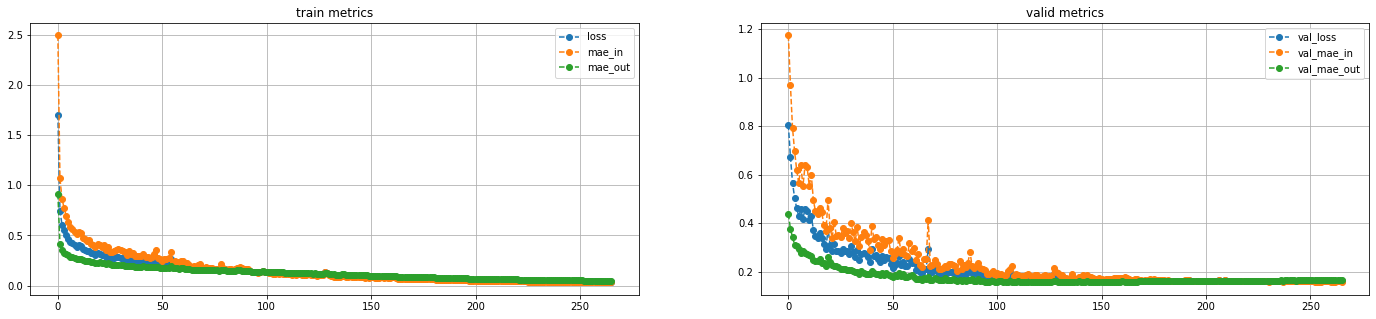

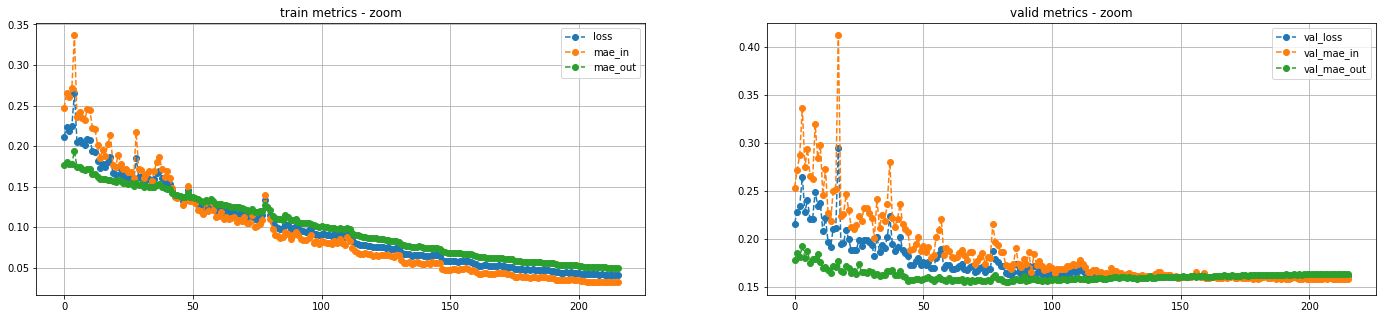

----------------------------------- Fold: 2 ------------------------------------
Epoch 1/300
129/129 [==============================] - 107s 488ms/step - loss: 1.8391 - mae_in: 2.5387 - mae_out: 1.1394 - val_loss: 0.8710 - val_mae_in: 1.2183 - val_mae_out: 0.5237
Epoch 2/300
129/129 [==============================] - 25s 195ms/step - loss: 0.7686 - mae_in: 1.0573 - mae_out: 0.4799 - val_loss: 0.7814 - val_mae_in: 1.1133 - val_mae_out: 0.4496
Epoch 3/300
129/129 [==============================] - 25s 196ms/step - loss: 0.6672 - mae_in: 0.9154 - mae_out: 0.4190 - val_loss: 0.6026 - val_mae_in: 0.8217 - val_mae_out: 0.3834
Epoch 4/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5711 - mae_in: 0.7778 - mae_out: 0.3644 - val_loss: 0.5560 - val_mae_in: 0.7614 - val_mae_out: 0.3505
Epoch 5/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5249 - mae_in: 0.7048 - mae_out: 0.3450 - val_loss: 0.5951 - val_mae_in: 0.8515 - val_mae_out: 0.3388
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold1/assets


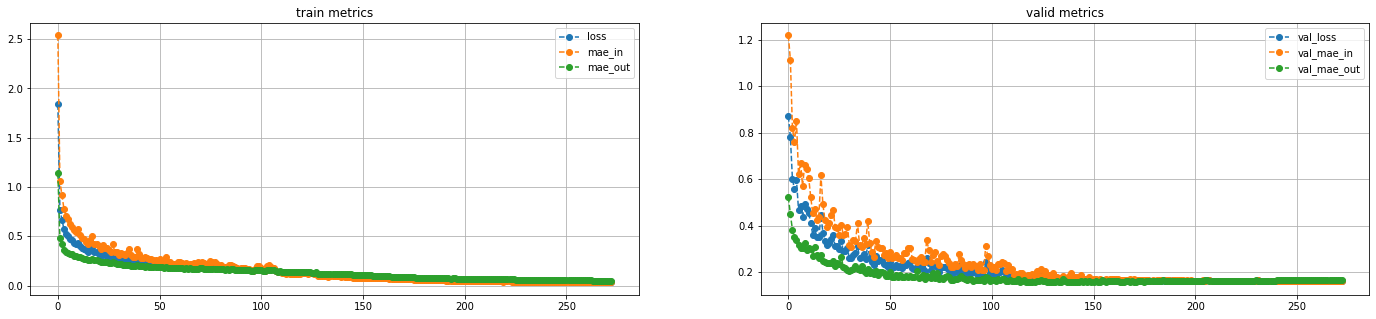

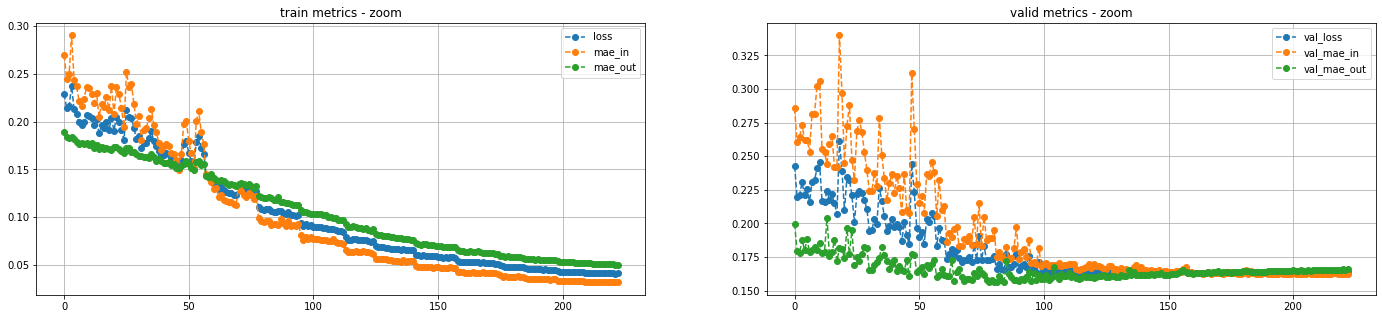

----------------------------------- Fold: 3 ------------------------------------
Epoch 1/300
129/129 [==============================] - 111s 514ms/step - loss: 1.8545 - mae_in: 2.6627 - mae_out: 1.0462 - val_loss: 0.8376 - val_mae_in: 1.2240 - val_mae_out: 0.4512
Epoch 2/300
129/129 [==============================] - 25s 195ms/step - loss: 0.7141 - mae_in: 1.0221 - mae_out: 0.4060 - val_loss: 0.6264 - val_mae_in: 0.8971 - val_mae_out: 0.3556
Epoch 3/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5867 - mae_in: 0.8302 - mae_out: 0.3432 - val_loss: 0.6204 - val_mae_in: 0.8874 - val_mae_out: 0.3534
Epoch 4/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5272 - mae_in: 0.7372 - mae_out: 0.3173 - val_loss: 0.4877 - val_mae_in: 0.6777 - val_mae_out: 0.2978
Epoch 5/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5081 - mae_in: 0.7068 - mae_out: 0.3094 - val_loss: 0.5347 - val_mae_in: 0.7433 - val_mae_out: 0.3260
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold2/assets


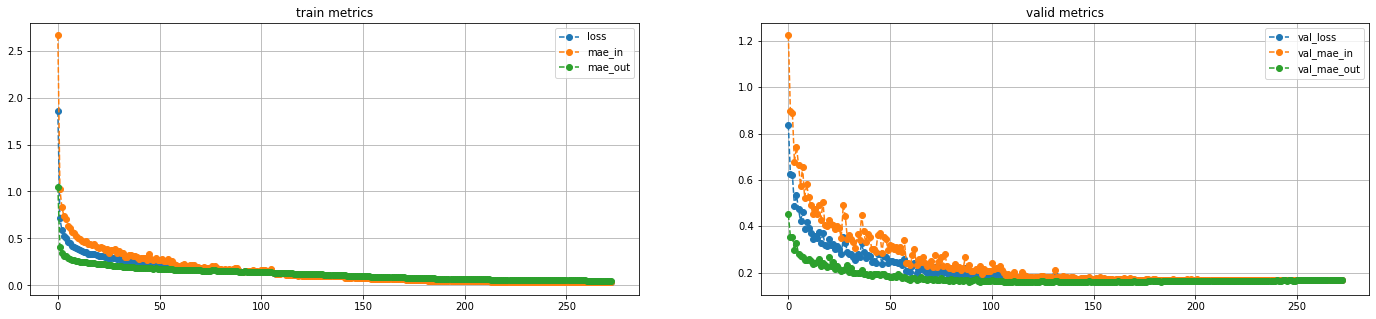

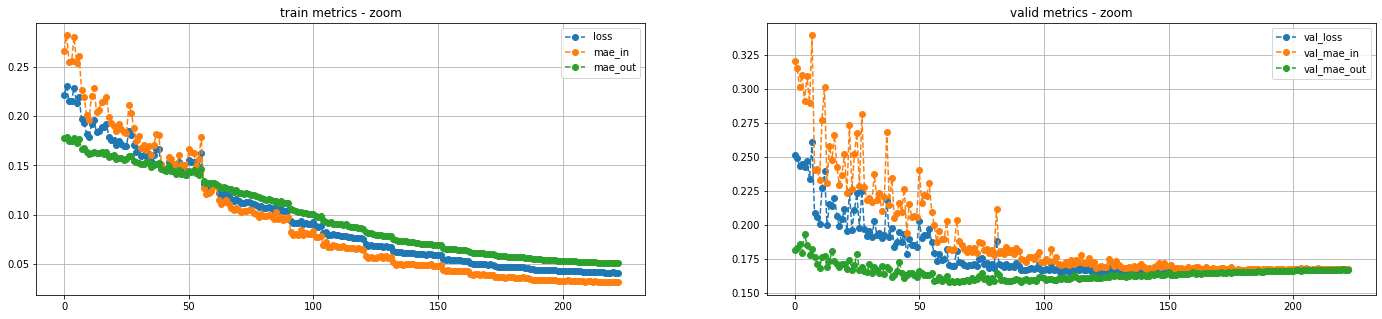

----------------------------------- Fold: 4 ------------------------------------
Epoch 1/300
129/129 [==============================] - 113s 524ms/step - loss: 1.8426 - mae_in: 2.5558 - mae_out: 1.1295 - val_loss: 0.9663 - val_mae_in: 1.4002 - val_mae_out: 0.5323
Epoch 2/300
129/129 [==============================] - 25s 196ms/step - loss: 0.8219 - mae_in: 1.1779 - mae_out: 0.4659 - val_loss: 0.7587 - val_mae_in: 1.0735 - val_mae_out: 0.4439
Epoch 3/300
129/129 [==============================] - 25s 196ms/step - loss: 0.6856 - mae_in: 0.9814 - mae_out: 0.3899 - val_loss: 0.6371 - val_mae_in: 0.8611 - val_mae_out: 0.4130
Epoch 4/300
129/129 [==============================] - 25s 196ms/step - loss: 0.6181 - mae_in: 0.8826 - mae_out: 0.3537 - val_loss: 0.5648 - val_mae_in: 0.7977 - val_mae_out: 0.3318
Epoch 5/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5628 - mae_in: 0.8001 - mae_out: 0.3254 - val_loss: 0.5195 - val_mae_in: 0.7199 - val_mae_out: 0.3190
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold3/assets


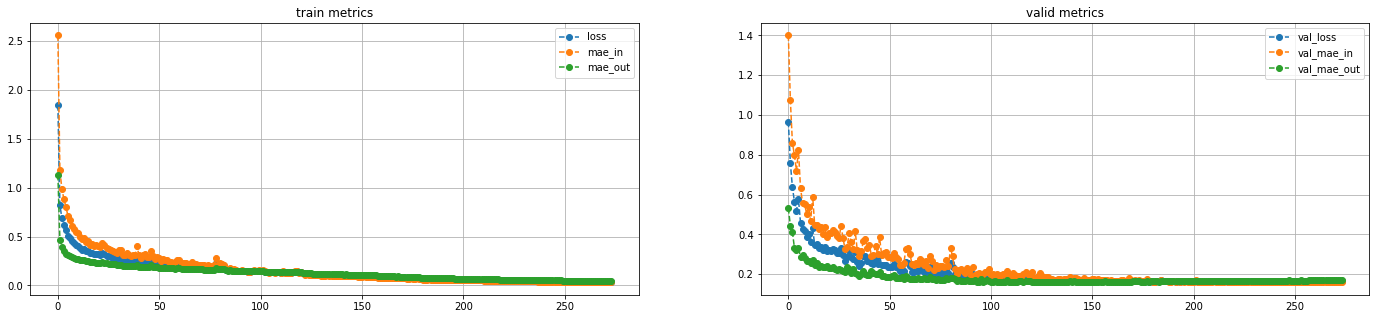

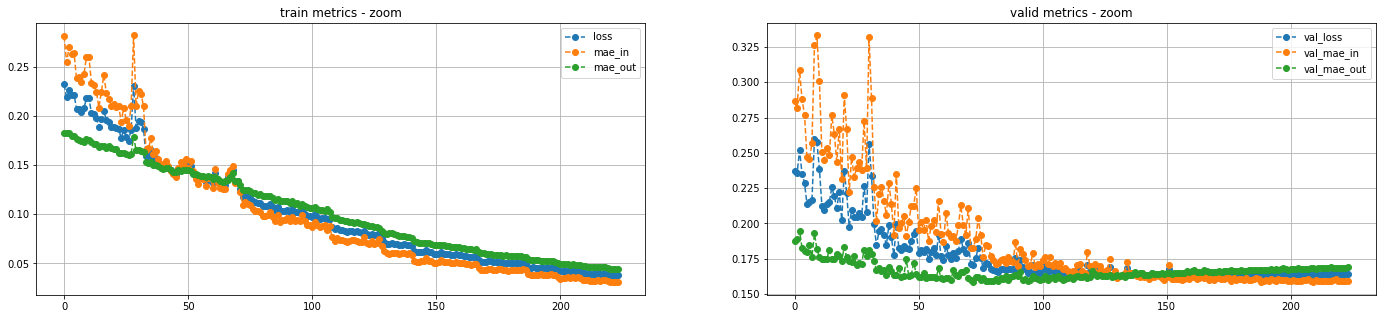

----------------------------------- Fold: 5 ------------------------------------
Epoch 1/300
129/129 [==============================] - 113s 498ms/step - loss: 2.0249 - mae_in: 2.8800 - mae_out: 1.1698 - val_loss: 0.9307 - val_mae_in: 1.2855 - val_mae_out: 0.5759
Epoch 2/300
129/129 [==============================] - 25s 196ms/step - loss: 0.8012 - mae_in: 1.0942 - mae_out: 0.5082 - val_loss: 0.6301 - val_mae_in: 0.8495 - val_mae_out: 0.4107
Epoch 3/300
129/129 [==============================] - 25s 196ms/step - loss: 0.6351 - mae_in: 0.8605 - mae_out: 0.4097 - val_loss: 0.5855 - val_mae_in: 0.7929 - val_mae_out: 0.3780
Epoch 4/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5775 - mae_in: 0.7741 - mae_out: 0.3810 - val_loss: 0.5920 - val_mae_in: 0.8247 - val_mae_out: 0.3594
Epoch 5/300
129/129 [==============================] - 25s 196ms/step - loss: 0.5223 - mae_in: 0.6838 - mae_out: 0.3608 - val_loss: 0.5533 - val_mae_in: 0.7591 - val_mae_out: 0.3476
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-2h_fold4/assets


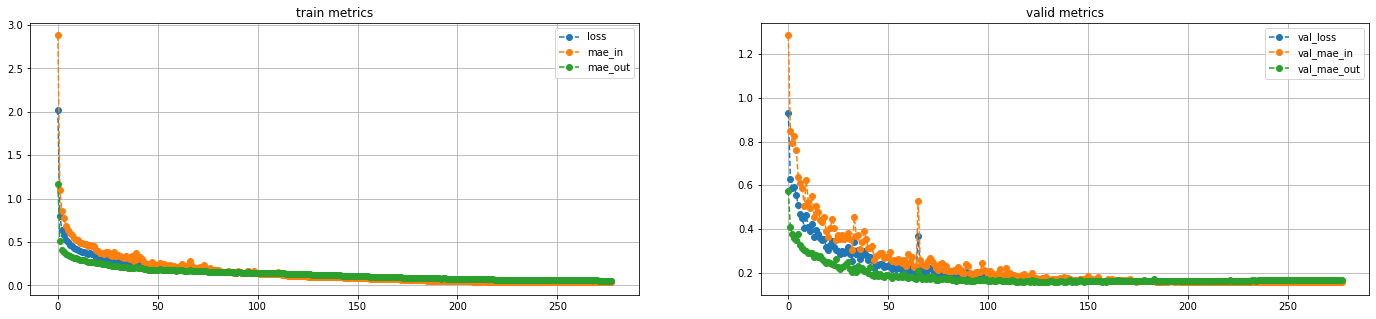

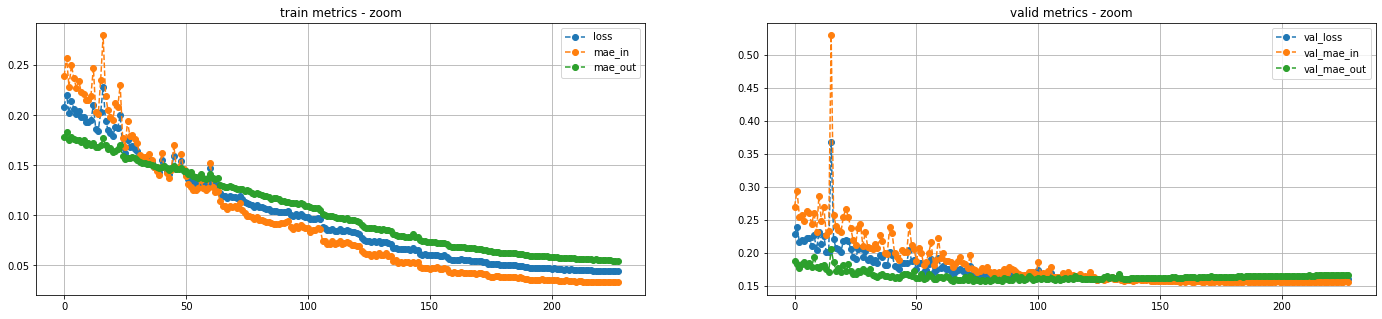

In [ ]:
models_by_fold = list()

for fold in range(len(split)):
    print(f" Fold: {fold+1} ".center(80, "-"))
    
    train_idx = split[f"fold-{fold}"]["train"]
    valid_idx = split[f"fold-{fold}"]["valid"]

    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    mask_in_train, mask_in_valid = mask_in[train_idx], mask_in[valid_idx]
    mask_out_train, mask_out_valid = mask_out[train_idx], mask_out[valid_idx]

    #scheduler = ExponentialDecay(
    #    initial_learning_rate=1e-3, 
    #    decay_steps=EPOCH*((len(train)*0.8)/BATCH_SIZE), 
    #    decay_rate=1e-5
    #)
    #lr = LearningRateScheduler(scheduler, verbose=1)

    #lr = OneCycleScheduler(
    #    max_lr = 1e-3,
    #    steps = config.EPOCHS * (X_train.shape[0]//config.BATCH_SIZE + 1),
    #    phase_1_pct = 0.25,
    #    init_div_factor = 0.5,
    #    final_div_factor = 1e1,
    #)

    #steps_per_epoch = (len(X_train) // config.BATCH_SIZE) + 1
    #lr = tfa.optimizers.CyclicalLearningRate(
    #    initial_learning_rate = config.INIT_LR,
    #    maximal_learning_rate = config.MAX_LR,
    #    scale_fn = lambda x: (0.8)**(x-1),
    #    step_size = 10*steps_per_epoch
    #)

    lr = ReduceLROnPlateau(
        monitor="val_mae_in", 
        factor=config.SCHEDULER_FACTOR, 
        patience=config.SCHEDULER_PATIENCE, 
        verbose=1,
        min_lr=1e-4,
        min_delta=0.0001,
    )

    es = EarlyStopping(
        monitor='val_mae_in', 
        mode='min', 
        patience=config.STOPPING_PATIENCE, 
        min_delta=0.0001,
        verbose=1,
        restore_best_weights=True,
    )
    #lws = LossWeightScheduler(
    #    alpha_start=1., 
    #    alpha_min=0., 
    #    start_epoch=100, 
    #    decay_epochs=100
    #)

    with tpu_strategy.scope():
        model = LSTMGRU2Heads()

        optimizer = tf.optimizers.Adam(learning_rate=1e-3)
        #optimizer = tfa.optimizers.SWA(opt, start_averaging=150, average_period=5)
        model.compile(optimizer=optimizer,)

        history = model.fit(
            [X_train,mask_in_train,mask_out_train], 
            y_train, 
            validation_data=([X_valid,mask_in_valid,mask_out_valid], y_valid), 
            epochs=config.EPOCHS,
            batch_size=config.BATCH_SIZE, 
            callbacks=[es,lr],
            shuffle=True,
            verbose=1,
        )
    
    models_by_fold.append(model)

    save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    model.save(f"{artifacts_path}/{config.MODEL_ID}_fold{fold}", options=save_locally)

    # generate the oof predictions
    oof_preds = model(tf.convert_to_tensor(X_valid), training=False)[0].numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()

    # metrics from epoch 0 ->
    plt.figure(figsize=(24,5))
    plt.subplot(1,2,1)
    plt.title("train metrics")
    plt.plot(history.history["loss"], "o--", label="loss")
    plt.plot(history.history["mae_in"], "o--", label="mae_in")
    plt.plot(history.history["mae_out"], "o--", label="mae_out")
    plt.grid()
    plt.legend(loc="best")

    plt.subplot(1,2,2)
    plt.title("valid metrics")
    plt.plot(history.history["val_loss"], "o--", label="val_loss")
    plt.plot(history.history["val_mae_in"], "o--", label="val_mae_in")
    plt.plot(history.history["val_mae_out"], "o--", label="val_mae_out")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

    # metrics from epoch 50 ->
    plt.figure(figsize=(24,5))
    plt.subplot(1,2,1)
    plt.title("train metrics - zoom")
    plt.plot(history.history["loss"][50:], "o--", label="loss")
    plt.plot(history.history["mae_in"][50:], "o--", label="mae_in")
    plt.plot(history.history["mae_out"][50:], "o--", label="mae_out")
    plt.grid()
    plt.legend(loc="best")

    plt.subplot(1,2,2)
    plt.title("valid metrics - zoom")
    plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
    plt.plot(history.history["val_mae_in"][50:], "o--", label="val_mae_in")
    plt.plot(history.history["val_mae_out"][50:], "o--", label="val_mae_out")
    plt.grid()
    plt.legend(loc="best")
    plt.show()


In [ ]:
# best with cyclical: 0.1816
# ReduceLROnPlateu (original features): 0.1640 (epoch 205)
# ReduceLROnPlateu (remove dups): 0.1655 (epoch 232)

Scheduler EXPS:
- **CyclicalLearningRate(1e-4 -> 1e-3, 0.8)** - epoch: 160 - loss: 0.0885 - mae_in: 0.0715 - mae_out: 0.1056 - val_loss: 0.1649 - val_mae_in: 0.1702 - val_mae_out: 0.1596
- **CyclicalLearningRate(1e-5 -> 1e-3, 0.8)** - epoch: 220 - loss: 0.0741 - mae_in: 0.0525 - mae_out: 0.0957 - val_loss: 0.1665 - val_mae_in: 0.1714 - val_mae_out: 0.1616
- **CyclicalLearningRate(1e-4 -> 1e-2, 0.8)** - epoch: 60 - loss: 0.1368 - mae_in: 0.1307 - mae_out: 0.1428 - val_loss: 0.1864 - val_mae_in: 0.2123 - val_mae_out: 0.1605
- **CyclicalLearningRate(1e-4 -> 1e-3, 0.8) plus Conv1D(32,5)** - epoch: 240 - loss: 0.0639 - mae_in: 0.0497 - mae_out: 0.0782 - val_loss: 0.1669 - val_mae_in: 0.1692 - val_mae_out: 0.1646
- **CyclicalLearningRate(1e-4 -> 1e-3, 0.8) plus Conv1D(32,9)** - epoch: 180 - loss: 0.0769 - mae_in: 0.0603 - mae_out: 0.0935 - val_loss: 0.1663 - val_mae_in: 0.1706 - val_mae_out: 0.1619

In [ ]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 5.390873908996582
mae inspiratory: 0.16055920720100403
mae expiratory : 8.632999420166016


In [ ]:
all_preds = list()

for model in models_by_fold:
    preds = model(tf.convert_to_tensor(test), training=False)[0].numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.median(all_preds, axis=0)

In [ ]:
# saves final sub
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}.csv", index=False)

sub["pressure"] =\
    np.round( (sub.pressure - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
sub.pressure = np.clip(sub.pressure, PRESSURE_MIN, PRESSURE_MAX)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}_clip.csv", index=False)

In [ ]:
# saves oof preds
oof.to_csv(f"{results_path}/oof_{config.MODEL_ID}.csv", index=False)

In [ ]:
# saves each model preds (pseudo labels)
for fold,preds in enumerate(all_preds):
    _sub = submission.copy()
    _test = test_raw[["id","pressure"]].copy()
    _test["pressure"] = preds
    _sub = pd.merge(_sub["id"], _test[["id","pressure"]], how="left", on="id")
    _sub["pressure"] = _sub["pressure"].fillna(0)
    _sub.to_csv(f"{results_path}/predictions_{config.MODEL_ID}_{fold}.csv", index=False)

***